In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = load_breast_cancer()
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [48]:
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [49]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
acc = model.score(X_test, y_test)
print(acc)

0.9298245614035088


In [50]:
pd.Series(y).value_counts()

1    357
0    212
Name: count, dtype: int64

In [51]:
pd.Series(y_test).value_counts()

1    72
0    42
Name: count, dtype: int64

In [59]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Classification Report:
               precision    recall  f1-score   support

   malignant       0.89      0.93      0.91        42
      benign       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114




Confusion Matrix:
 [[39  3]
 [ 5 67]]

Classification Report:
               precision    recall  f1-score   support

   malignant       0.89      0.93      0.91        42
      benign       0.96      0.93      0.94        72

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



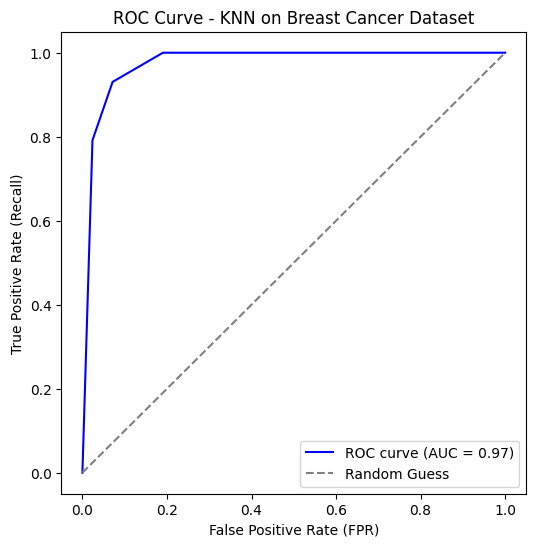

In [58]:
y_pred = model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))

# 5. ROC and AUC
y_prob = model.predict_proba(X_test)[:, 1]  # probability of class 1 (malignant)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color="blue", label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="gray", linestyle="--", label="Random Guess")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - KNN on Breast Cancer Dataset")
plt.legend(loc="lower right")
plt.show()